# Gender Classification Dataset

## 0.Описание задачи
### Набор данных содержит 7 признаков и 1 набор меток

* longhair - столбец содержит нули и единицы, где 0 - "короткие волосы", 1 - "длинные волосы"
* foreheadwidthcm  - единица измерения сантиметры, столбец содержит информацию ширины лба
* foreheadheightcm - это высота лба в сантиметрах
* nosewide - столбец содержит нули и единицы, где 1 - "широкий нос", 0 - "неширокий нос"
* noselong - столбец содержит нули и единицы, где 1 - "длинный нос", 0 - "недлинный нос"
* lipsthin - столбец содержит нули и единицы, где 1 - "тонкие губы", 0 - "нетонкие губы"
* distancenosetoliplong - столбец содержит нули и единицы, где 1 - "длинное расстояние от носа до губ", 0 - "недлинное расстояние от носа до губ"


* gender - это либо "мужчина", либо "женщина"

Задача - предсказание полового признака

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


3.3.2
0.11.0


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## 1.Прочитаем данные

In [5]:
#imdb_df = pd.read_csv("C:/Users/1197994/Новая папка (2)/Практика MLPractise-IMDB-Movies-Dataset/archive/imdb_top_1000.csv")
data = pd.read_csv("C:/Users/1197994/Новая папка (2)/Практика MLPractise-IMDB-Movies-Dataset/GenderClassification/archive (1)/gender_classification_v7.csv")

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [7]:
type(data)

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.frame.DataFrame

## 2.Визуализируем данные и вычислим основные характеристики

In [8]:
data.head()


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [9]:
data.tail()

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.corr()

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000


C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'forehead width vs forehead height')

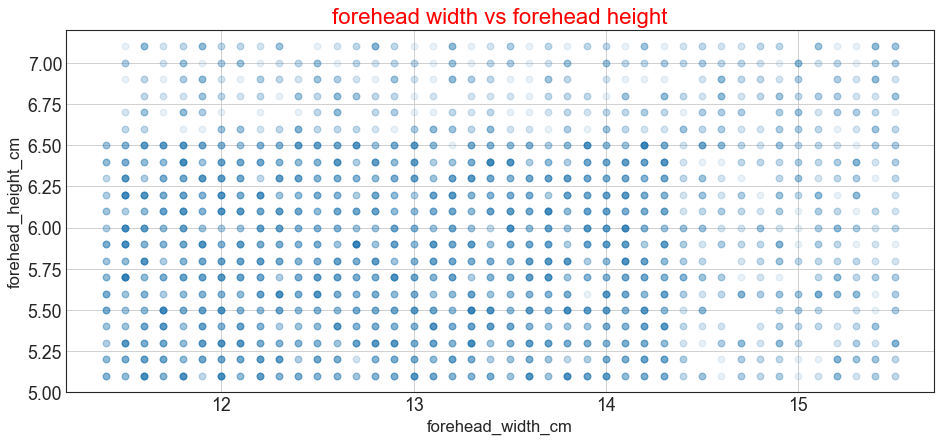

In [13]:
plt.figure(figsize=(14,6), dpi= 80)
plt.scatter(data['forehead_width_cm'],data['forehead_height_cm'],alpha = 0.1)
plt.xlabel('forehead_width_cm', size = 15)
plt.ylabel('forehead_height_cm', size = 15)
plt.grid()
plt.title('forehead width vs forehead height',size = 20, color = 'r')

## 3. Убедимся, что нет пропущенных значений

In [14]:
is_null = data.isnull()
row_with_null = is_null.any(axis=1)
rows_with_null = data[row_with_null]
rows_with_null

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender


## 4.Преобразуем категориальные данные в числовые 

In [15]:
data['gender'] = pd.get_dummies(data['gender'])
data

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,1
4997,1,11.9,5.4,0,0,0,0,1
4998,1,12.9,5.7,0,0,0,0,1
4999,1,13.2,6.2,0,0,0,0,1


In [16]:
X = data.drop(['gender'], axis = 1)
X

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [17]:
y = data['gender']
y

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       0
1       1
2       0
3       0
4       1
       ..
4996    1
4997    1
4998    1
4999    1
5000    0
Name: gender, Length: 5001, dtype: uint8

## Разобьем данные на обучающую и тестовую выборки

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [19]:
X_train.shape, X_test.shape

((4000, 7), (1001, 7))

## Let's train the (KNN) k-Nearest Neighbourhood model
## Обучаем классификатор kNN

*Евклидово расстояние* ($\ell_2$-метрика):
$$
\rho_2(x,x') = \sqrt{\sum_{j=1}^d (x_j - x_j')^2}
$$

*Манхеттеновское расстояние* ($\ell_1$-метрика):
$$
\rho_1(x,x') = \sum_{j=1}^d |x_j - x_j'|
$$


*Чебышевское расстояние* ($\ell_{\infty}$-метрика):
$$
\rho_{\infty}(x,x') = \max_{j=1,\dots,d} |x_j - x_j'|
$$

Приведенные выше метрики являются частным случаем *расстояния Минковского*:
$$
\rho_p(x,x') = \left(\sum_{j=1}^d |x_j - x_j'|^p\right)^{1/p} \qquad (p\ge 1)
$$


In [59]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2, p=1)
model.fit(X_train, y_train)

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KNeighborsClassifier(n_neighbors=2, p=1)

In [60]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
y_train.shape

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4000,)

In [62]:
y_train != y_train_pred

1056    False
1686    False
187     False
3840    False
1525    False
        ...  
2895    False
2763    False
905     False
3980    False
235     False
Name: gender, Length: 4000, dtype: bool

In [63]:
y_test != y_test_pred

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2764    False
4767    False
3814    False
3499     True
2735    False
        ...  
921     False
4087    False
1242    False
2242    False
1233    False
Name: gender, Length: 1001, dtype: bool

In [64]:
Ошибки на обучающей и тестовой выборках:

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: invalid syntax (<ipython-input-64-3260f54bae8a>, line 1)

In [65]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.01875, 0.04395604395604396)

In [66]:
Calculate the accuracy:

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: invalid syntax (<ipython-input-66-f57a46f5ebbc>, line 1)

In [67]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.98125, 0.9560439560439561)

Compute the error:

In [68]:
1 - model.score(X_train, y_train), 1 - model.score(X_test, y_test)

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.018750000000000044, 0.04395604395604391)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, p=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)


C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.02025, 0.03496503496503497)

In [70]:
model.score(X_train, y_train), model.score(X_test, y_test)

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.97975, 0.965034965034965)

In [71]:
1 - model.score(X_train, y_train),1 - model.score(X_test, y_test)

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.02024999999999999, 0.034965034965035)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1, p=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.001, 0.04095904095904096)

In [73]:
model.score(X_train, y_train), model.score(X_test, y_test)

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.999, 0.9590409590409591)

In [75]:
1 - model.score(X_train, y_train), 1 - model.score(X_test, y_test)

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.0010000000000000009, 0.040959040959040904)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2, p=2)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.01825, 0.04295704295704296)

In [77]:
model.score(X_train, y_train), model.score(X_test, y_test)

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.98175, 0.957042957042957)

In [78]:
1 - model.score(X_train, y_train),1 - model.score(X_test, y_test)

C:\Users\1197994\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.01824999999999999, 0.957042957042957)